In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# Get batches from a list
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

In [2]:
# Paths

# SED folder path
SED_path = './../../../wf-psf/data/SEDs/save_SEDs/'
# Output saving path (in node05 of candide)
output_folder = './../../../../../n05data/ecentofanti/WFE_sampling_test/multires_dataset/'


In [46]:
# Load the SEDs
stellar_SEDs = np.load(SED_path + 'SEDs.npy', allow_pickle=True)
stellar_lambdas = np.load(SED_path + 'lambdas.npy', allow_pickle=True)

SED_name = ['O5V', 'B0V', 'B5-7V', 'A0V', 'A5V', 'F0V', 'F5V', 'G0V', 'G5V', 'K0V', 'K5V', 'M0V', 'M5V']

(530.0, 965.0)

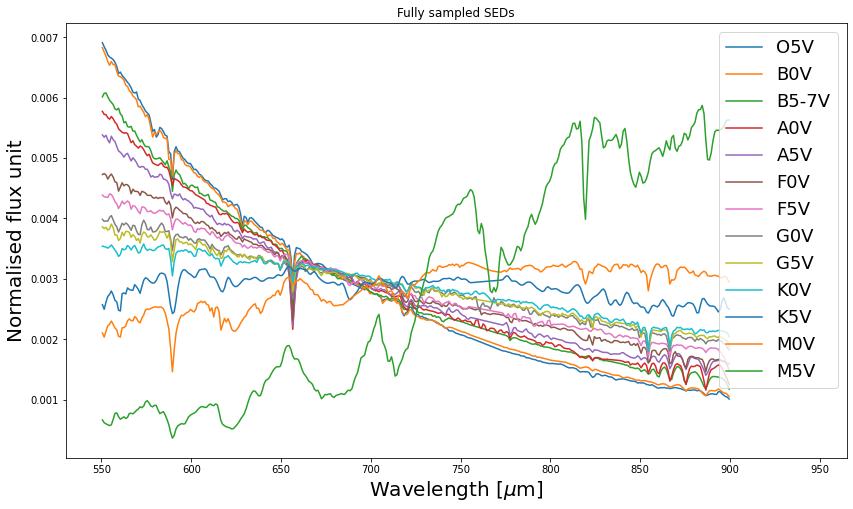

In [49]:
plt.figure(figsize=(14,8))

for idx in range(stellar_SEDs.shape[0]):
    plt.plot(stellar_lambdas, stellar_SEDs[idx,:], label=SED_name[idx])

ax = plt.gca()
plt.legend(fontsize=18)
plt.title('Fully sampled SEDs')
plt.xlabel(r'Wavelength [$\mu$m]', fontsize=20)
plt.ylabel('Normalised flux unit', fontsize=20)
ax.set_xlim([530, 965])
    

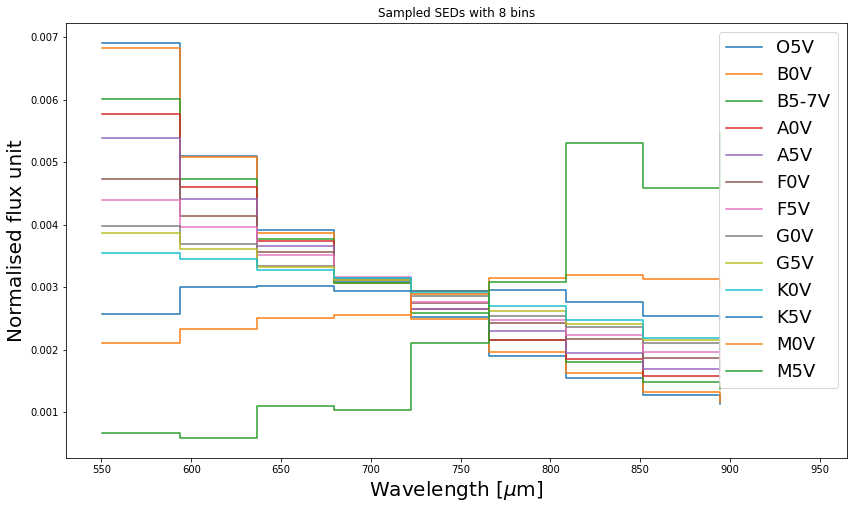

In [51]:
plt.figure(figsize=(14,8))

n_bins = 8
step = int(stellar_SEDs.shape[1]/(n_bins))
for idx in range(stellar_SEDs.shape[0]):
    plt.step(stellar_lambdas[0:-1:step], stellar_SEDs[idx,0:-1:step],where='post', label=SED_name[idx])

ax = plt.gca()
plt.legend(fontsize=18)
plt.title('Sampled SEDs with {n_bins} bins'.format(n_bins=n_bins))
plt.xlabel(r'Wavelength [$\mu$m]', fontsize=20)
plt.ylabel('Normalised flux unit', fontsize=20)
ax.set_xlim([530, 965])
plt.show()

In [53]:
stellar_SEDs.shape

(13, 350)

In [67]:
# Average SEDs throughout each wavelenght bin
n_bins = 8
step = int(np.ceil(stellar_SEDs.shape[1]/(n_bins)))

# New SEDs with only n_bins points
stellar_SEDs_filt = np.zeros((stellar_SEDs.shape[0], n_bins))

for idx in range(stellar_SEDs.shape[0]):
    i = 0
    for band in chunker(stellar_SEDs[idx,:], step):
        stellar_SEDs_filt[idx,i] = np.average(band)
        i = i+1

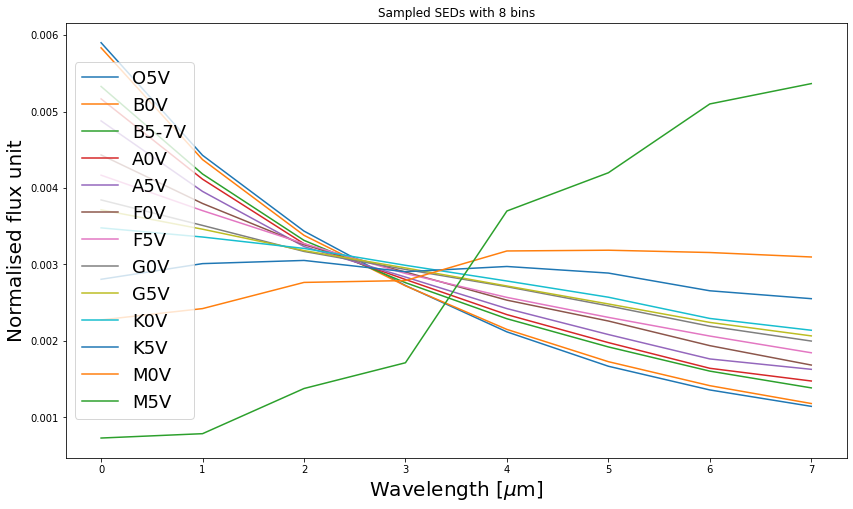

In [70]:
plt.figure(figsize=(14,8))

for idx in range(stellar_SEDs_filt.shape[0]):
    plt.plot(stellar_SEDs_filt[idx,:], label=SED_name[idx])

ax = plt.gca()
plt.legend(fontsize=18)
plt.title('Sampled SEDs with {n_bins} bins'.format(n_bins=n_bins))
plt.xlabel(r'Wavelength [$\mu$m]', fontsize=20)
plt.ylabel('Normalised flux unit', fontsize=20)
plt.show()

In [69]:
stellar_SEDs_filt

array([[0.00590133, 0.00442823, 0.00343664, 0.00272448, 0.00211808,
        0.00166845, 0.00135829, 0.00114377],
       [0.00583414, 0.00437196, 0.00338115, 0.00272036, 0.00215024,
        0.00172822, 0.00141417, 0.00118071],
       [0.0053286 , 0.00418356, 0.00331535, 0.00276173, 0.00228986,
        0.00192119, 0.0016046 , 0.00138535],
       [0.00516603, 0.00411566, 0.00327107, 0.00280326, 0.00234381,
        0.00197764, 0.0016416 , 0.00147527],
       [0.00487796, 0.0039556 , 0.0032344 , 0.00283534, 0.00242259,
        0.00208333, 0.00176396, 0.00162811],
       [0.00443303, 0.00379777, 0.00325754, 0.00290059, 0.00253287,
        0.00226011, 0.00193785, 0.00168406],
       [0.00416788, 0.00370399, 0.00327241, 0.00288179, 0.00256921,
        0.0023077 , 0.00206342, 0.00184473],
       [0.00384412, 0.00351074, 0.00317042, 0.00293506, 0.00270888,
        0.00245853, 0.00219238, 0.00199795],
       [0.00371459, 0.00346123, 0.00318151, 0.00295491, 0.00271822,
        0.00248333, 0.002241